In [133]:
#conda install -c conda-forge cartopy

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

df = pd.read_csv(r'C:\Users\Sumanth\Desktop\Coronanew\COVID19_open_line_list.csv',error_bad_lines=False)
df1 = df[['ID', 'latitude', 'longitude', 'date_confirmation']]

#only after removing all the unnecassary columns from source file the data is read correctly. The root cause seems to be a 
#non-ASCII character in some other columns

#df1['date_confirmation'] = df['date_confirmation'].astype('datetime64[ns]')

df1['date_confirmation']= pd.to_datetime(df1['date_confirmation']) 
df1['date_confirmation'] = df1['date_confirmation'].dt.strftime('%d.%m.%Y') #changes date format but also changes it to string
df1['date_confirmation']= pd.to_datetime(df1['date_confirmation']) #converting it back to date format
df.sort_values(['date_confirmation'])
df1.head()
#df.info()



,ID,latitude,longitude,date_confirmation
0,1,31.646960,117.716600,2020-01-22
1,2,31.778630,117.331900,2020-01-23
2,3,31.828313,117.224844,2020-01-23
3,4,31.828313,117.224844,2020-01-23
4,5,32.001230,117.568100,2020-01-23


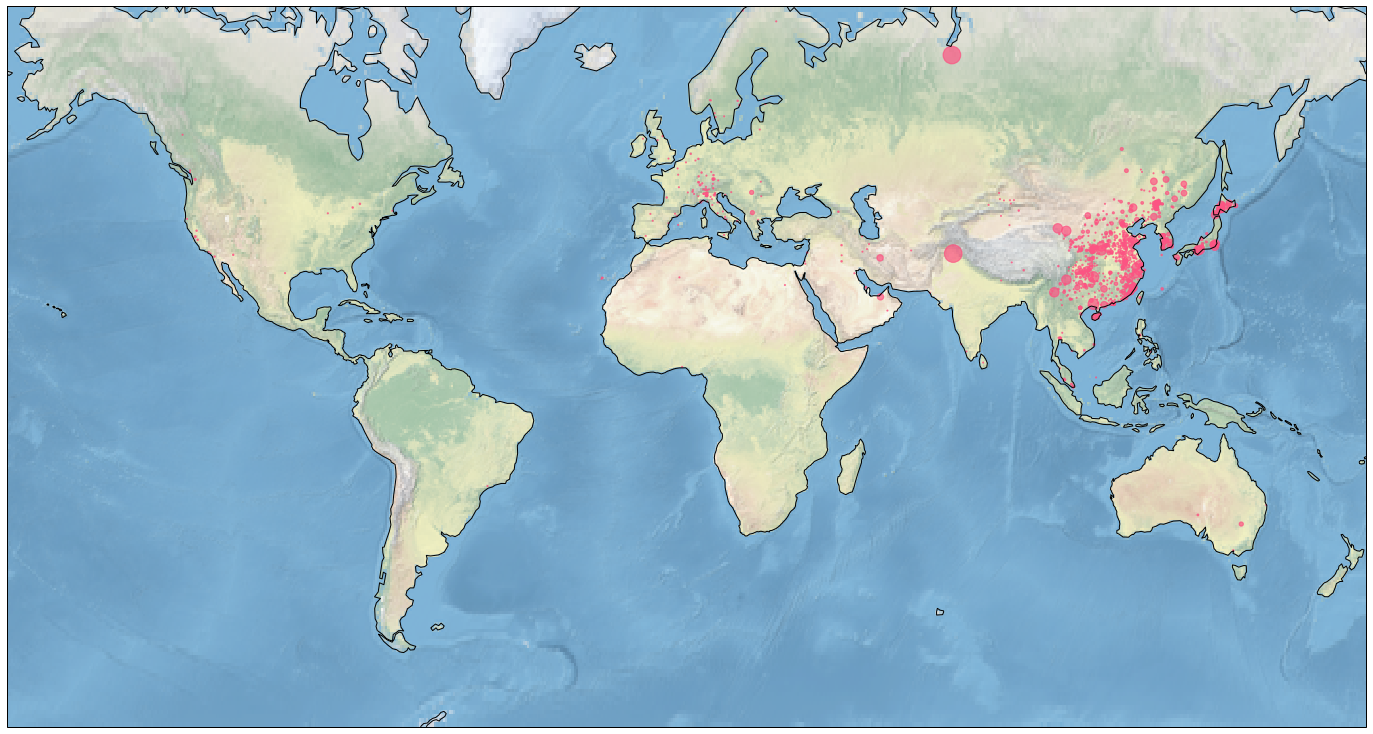

In [125]:

fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0, min_latitude=-65, max_latitude=70))
#ax.background_img(name='BM', resolution='low')
ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

colors = '#ff5483'

for virus in df1:
    
    corona_count = df1.groupby(['longitude', 'latitude']).count()
    # Get lists for longitudes and latitudes of regions affected with corona
    index = list(corona_count.index)
    longs = [each[0] for each in index]
    lats = [each[1] for each in index]
    sizes = corona_count*1  
    ax.scatter(longs, lats, s=sizes, color=colors, alpha=0.25, transform=ccrs.PlateCarree())
    
                  
# Expands image to fill the figure and cut off margins
fig.tight_layout(pad=-0.5)

start_date = df1['date_confirmation'].min()
end_date = df1['date_confirmation'].max()


#make_grads_map(end_date, df1, ax=ax, resolution='full')


C:\Users\Sumanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


ModuleNotFoundError: No module named 'cv2'

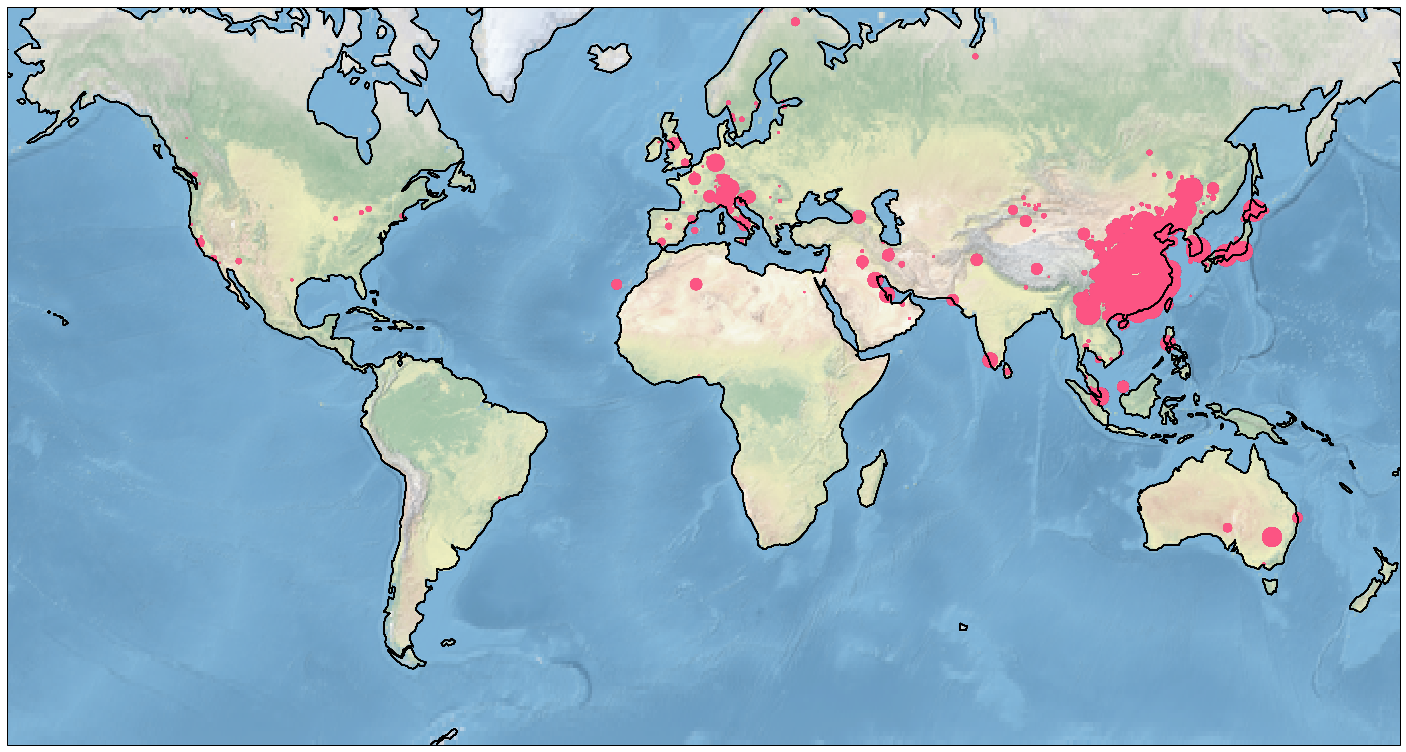

In [139]:
              

def make_grads_map(date, data, ax=None, resolution='low'):
    if ax is None:
        fig = plt.figure(figsize=(19.2, 10.8))
        ax = plt.axes(projection=ccrs.Mercator(min_latitude=-65, max_latitude=70)) 
    #ax.background_img(name='BM', resolution=resolution)
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())

#print(start_date)
#print(end_date)
date = end_date - start_date

fig = plt.figure(figsize=(19.2, 10.8))
#ax = plt.axes(projection=ccrs.Mercator(min_latitude=-65, max_latitude=70))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0, min_latitude=-65, max_latitude=70))

f = make_grads_map(date, df1, ax=ax, resolution='full')

#ax.scatter(longs, lats, s=sizes, color=colors, alpha=0.25, transform=ccrs.PlateCarree())


# Generate an image for each day between start_date and end_date
for ii, days in enumerate(range((end_date - start_date).days)):
    date = start_date + timedelta(days)
    ax.stock_img()
    ax.coastlines()
    #f = make_grads_map(date, df1, ax=ax, resolution='full')
    ax.scatter(df1.longitude, df1.latitude, s=sizes, color=colors, alpha=0.25, transform=ccrs.PlateCarree())
    fig.tight_layout(pad=-0.5)
    fig.savefig(f"frames_{ii:04d}.png", dpi=100, frameon=False, facecolor='black')


#ffmpeg -r30 -i frames_%4d.png -c:v h264 -r 30 -s 1920x1080 ./grads.mp4
              
  


              


In [141]:
          
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('C:/Users/Sumanth/corona/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()   
    